In [2]:
#%matplotlib
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
#%matplotlib

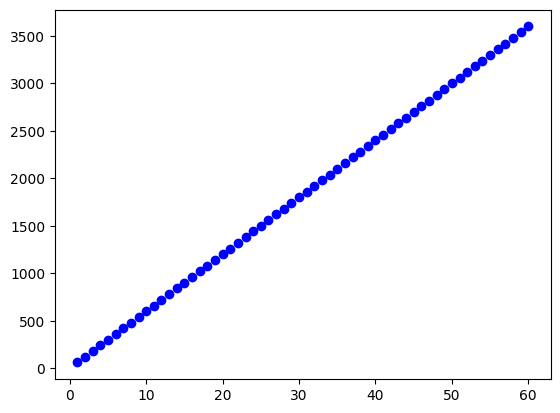

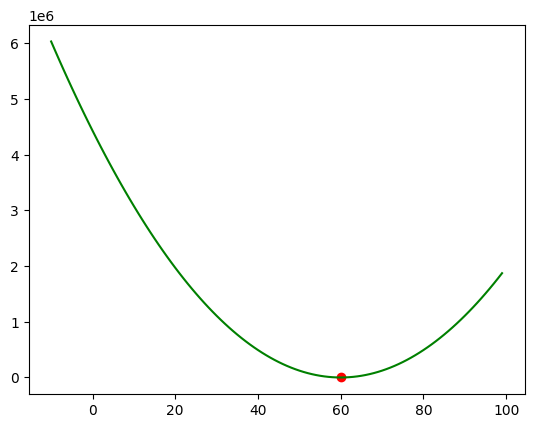

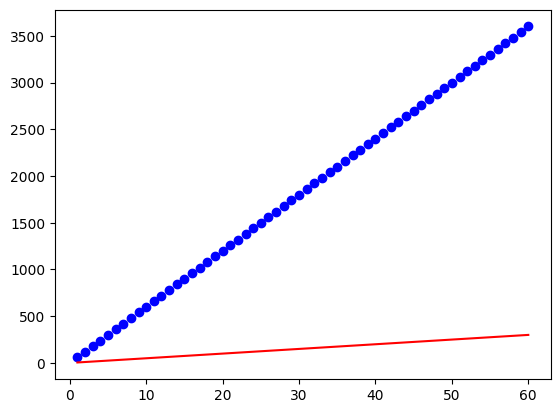

MSE:3721254.1666666665


In [6]:
X=np.arange(1,61)
y_true=X*60

plt.scatter(X,y_true,color='blue')

coef_range= np.arange(-10,100)
mse_value=[]

for theta in coef_range:
    y_pred=X*theta
    mse_value.append(np.mean((y_true-y_pred)**2))

plt.show()
plt.plot(coef_range,mse_value,color='green')
min_value_index=np.array(mse_value).argmin()
plt.scatter(coef_range[min_value_index],mse_value[min_value_index],color='red')
plt.show()
y_pred=coef_range[min_value_index]*X
y_pred=60*X
y_pred=5*X
plt.scatter(X,y_true,color='blue')
plt.plot(X,y_pred,color='red')
plt.show()
mse=mean_squared_error(y_pred,y_true)
print(f'MSE:{mse}')


0.839894447047878


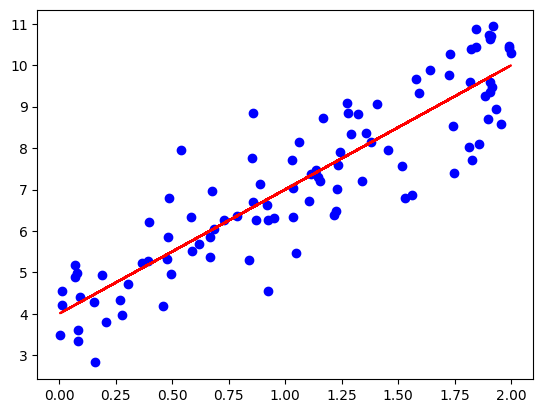

In [2]:
X=2*np.random.rand(100,1)
y_true=4+3*X +np.random.randn(100,1)
plt.scatter(X,y_true,color='blue')
theta_0=4
theta_1=3
y_pred=theta_0+theta_1*X
plt.plot(X,y_pred,color='red')
print(mean_squared_error(y_true,y_pred))

t0=0, t1=9
16.071052160070128


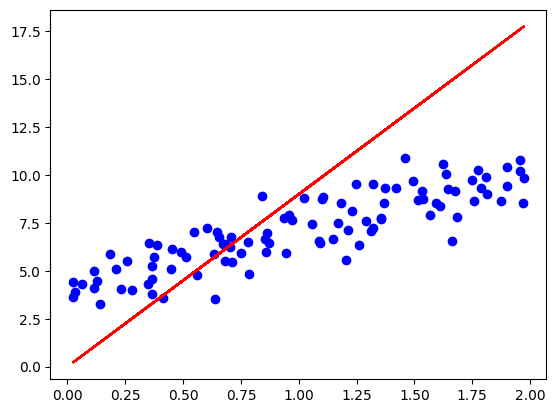

In [6]:
X=2*np.random.rand(100,1)
y_true=4+3*X +np.random.randn(100,1)
plt.scatter(X,y_true,color='blue')
theta_0=np.random.randint(0,10)
theta_1=np.random.randint(0,10)
print(f"t0={theta_0}, t1={theta_1}")
y_pred=theta_0+theta_1*X
plt.plot(X,y_pred,color='red')
print(mean_squared_error(y_true,y_pred))

[5.         2.         1.42854192]


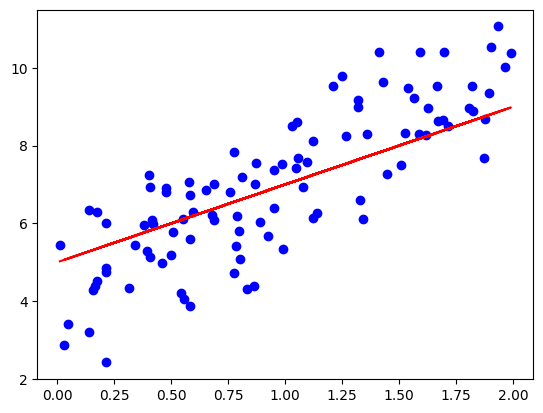

In [10]:
n=100
result=[]
X=2*np.random.rand(n,1)

y_true=4+3*X +np.random.randn(n,1)
plt.scatter(X,y_true,color='blue')
for i in range(1000):
    theta_0=np.random.randint(-10,10)
    theta_1=np.random.randint(-10,10)
    y_pred=theta_0+theta_1*X    
    mse=mean_squared_error(y_true,y_pred)
    result.append([theta_0,theta_1,mse])
result=np.array(result)   
min_indices = np.argmin(result[:,2], axis=0)
y_pred=result[min_indices][0]+result[min_indices][1]*X
plt.plot(X,y_pred,color='red')
print(result[min_indices])


In [89]:
def LS(x,y):
    x2=x**2
    xy=x*y
    theta1=(n*np.sum(xy) - (np.sum(x) * np.sum(y)))  / ( (n*np.sum(x2)) - np.sum(x)**2) 
    theta0=(np.sum(y)- theta1*np.sum(x))/n
    return theta0,theta1

3.6894465886061467 2.8393648998804566
0.08802957783315893


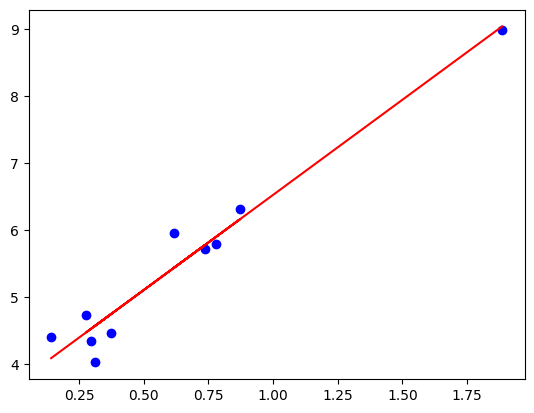

In [101]:
n=10
X=2*np.random.rand(n,1)
y_true=4+3*X +np.random.randn(n,1)
plt.scatter(X,y_true,color='blue')
# LS
theta_0,theta_1=LS(X,y_true)
print(theta_0,theta_1)
y_pred=theta_0+theta_1*X 
mse=mean_squared_error(y_true,y_pred)
plt.plot(X,y_pred,color='red')
print(mse)

[-0.34562571  2.02758653]


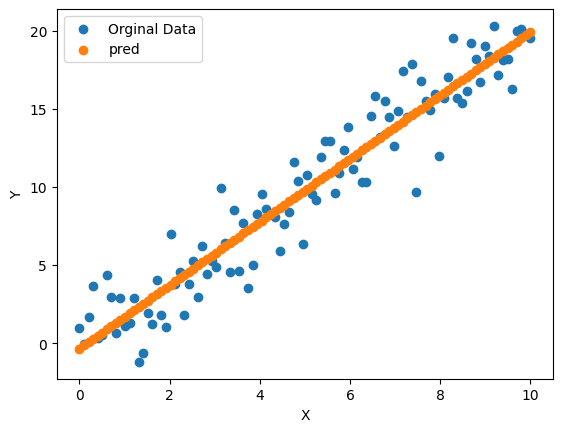

In [12]:

n = 100
X1 = np.linspace(0, 10, n)
noise = np.random.normal(0, 2, n)  
Y = (2 * X1 )+noise
X=np.c_[np.ones(len(X1)),X1]
#print(X)
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y
print(coefficients)
y_pred = X @ coefficients

plt.scatter(X1, Y, label='Orginal Data')
plt.scatter(X1, y_pred, label='pred')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [14]:
np.random.seed(42)
n = 100
X1 = np.linspace(0, 10, n)
X2 = np.random.normal(0, 2, n) 
noise = np.random.normal(0, 2, n)  
Y = (2 * X1 )+noise
X=np.c_[np.ones(len(X1)),X1,X2]
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y
print(coefficients)
y_pred = X @ coefficients

print(mean_squared_error(Y,y_pred))

[-0.02527308  2.00800188 -0.14383176]
3.5339866441245293


In [15]:
X=np.random.rand(10,20)
Y=X[0]*5
X=np.c_[np.ones(len(X)),X]
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 10)

In [13]:
X=np.random.rand(10000,10000)
Y=X[0]*5
X=np.c_[np.ones(len(X)),X]
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y

C:\Users\Naeim\AppData\Local\Temp\ipykernel_10476\3398511522.py:4: RuntimeWarning: invalid value encountered in matmul
  coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y


In [32]:
def f(x):
    return x*x - 5*x +5
f(2.5)

-1.25

In [114]:
def f(x):
    return x**2 - 5*x +5
def df(x):
    return 2*x-5

N = 20 
LR=0.0001

x=np.arange(0,5,0.1)
y=[ f(i) for i in x]
xx=np.random.choice(x)
xx=2
plt.ion()
fig,ax=plt.subplots()
ax.grid(True)
ax.plot(x,y)
point=ax.scatter(xx,f(xx),c='red')
for i in range(N):
    
    #xx=xx-df(xx)  
    xx=xx-LR*df(xx)  
    point.set_offsets([xx,f(xx)])
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.02)
plt.ioff()
print(xx)
ax.scatter(xx,f(xx),c='blue')
plt.show() 


2.4942353924769654


In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib
def f(x):
    return np.sin(x)+0.5*x
def df(x):
    return np.cos(x)+0.5

N = 20 
LR=0.0001

x=np.arange(-10,10,0.1)
y=[ f(i) for i in x]
xx=np.random.choice(x)
xx=2
plt.ion()
fig,ax=plt.subplots()
ax.grid(True)
ax.plot(x,y)
point=ax.scatter(xx,f(xx),c='red')
for i in range(N):
    
    #xx=xx-df(xx)  
    xx=xx-LR*df(xx)  
    point.set_offsets([xx,f(xx)])
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.02)
plt.ioff()
print(xx)
ax.scatter(xx,f(xx),c='blue')
plt.show() 

Using matplotlib backend: <object object at 0x00000199FF7B7820>
1.9998321487202213


: 

[3.77060306] [3.18162475]


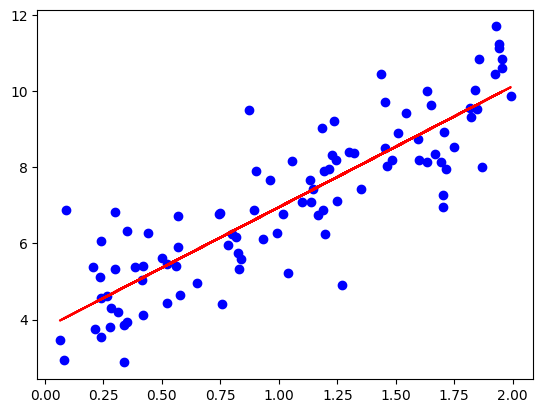

In [3]:
x=2*np.random.rand(100,1)
y=4+3*x +np.random.randn(100,1)
iterations = 1000
alpha=0.1
theta_0=0
theta_1=0
n=len(x)
for _ in range(iterations):
    y_pred=theta_0+theta_1*x

    d_theta_0 = (-2/n) * sum(y - y_pred)
    d_theta_1 = (-2/n) * sum((y - y_pred) * x)

    theta_0 = theta_0 - alpha * d_theta_0
    theta_1 = theta_1 - alpha * d_theta_1

print(theta_0,theta_1)
plt.scatter(x, y, color='blue', label='Data')
y_pred = theta_0 + theta_1 * x
plt.plot(x, y_pred, color='red', label='pred')

In [38]:
def gradient_descent(x,y,alpha=0.1,iter=100):
    theta_0=0
    theta_1=0
    n=len(x)
    for _ in range(iter):
        y_pred=theta_0+theta_1*x

        d_theta_0 = (-2/n) * sum(y - y_pred)
        d_theta_1 = (-2/n) * sum((y - y_pred) * x)

        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
    return theta_0,theta_1
    

In [39]:
x=2*np.random.rand(100,1)
y=4+3*x +np.random.randn(100,1)
theta_0,theta_1=gradient_descent(x,y,0.01,1000)

print(theta_0,theta_1)
plt.scatter(x, y, color='blue', label='Data')
y_pred = theta_0 + theta_1 * x
plt.plot(x, y_pred, color='red', label='pred')
plt.legend()
plt.show()

[3.3679966] [3.41947701]


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x=2*np.random.rand(100,1)
y=4+3*x +np.random.randn(100,1)

def compute_cost(theta_0, theta_1, x, y):
    m = len(x)
    y_pred = theta_0 + theta_1 * x
    return (1/m) * np.sum((y_pred - y)**2)


theta_0,theta_1=gradient_descent(x,y,0.1,100)
theta_0_vals=np.linspace(1, 4, 100)
theta_1_vals=np.linspace(1, 4, 100)

theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_vals, theta_1_vals)
cost_vals = np.zeros_like(theta_0_mesh)

for i in range(theta_0_mesh.shape[0]):
    for j in range(theta_0_mesh.shape[1]):
        cost_vals[i, j] = compute_cost(theta_0_mesh[i, j], theta_1_mesh[i, j], x, y)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(theta_0_mesh, theta_1_mesh, cost_vals, cmap='viridis', edgecolor='none', alpha=0.7)
optimal_cost = compute_cost(theta_0, theta_1, x, y)
ax.scatter(theta_0, theta_1, optimal_cost, color='green', s=100, label='Optimal Point')


ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost (MSE)')
ax.legend()

plt.show()
print(f"Optimal theta_0: {theta_0}, Optimal theta_1: {theta_1}, Cost: {optimal_cost}")



Optimal theta_0: [4.04281621], Optimal theta_1: [3.03220634], Cost: 0.8854555139419067


In [8]:
def gradient_descent(x,y,alpha=0.1,iter=100):
    cost=[]
    theta_0=0
    theta_1=0
    n=len(x)
    for _ in range(iter):
        y_pred=theta_0+theta_1*x
        
        d_theta_0 = (-2/n) * sum(y - y_pred)
        d_theta_1 = (-2/n) * sum((y - y_pred) * x)
        cost.append((1/n) * np.sum((y_pred - y)**2))
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        
    return theta_0,theta_1,cost

In [6]:
def gradient_descent(x,y,alpha=0.1,iter=100):
    cost=[]
    theta_0=0
    theta_1=0
    n=len(x)
    for _ in range(iter):
        y_pred=theta_0+theta_1*x
        cost.append((1/n) * np.sum((y_pred - y)**2))
        d_theta_0 = (-2/n) * sum(y - y_pred)
        d_theta_1 = (-2/n) * sum((y - y_pred) * x)

        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1
        
    return theta_0,theta_1,cost
    

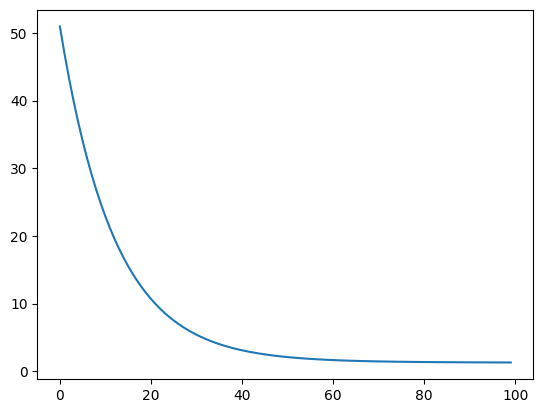

In [13]:
x=2*np.random.rand(100,1)
y=4+3*x +np.random.randn(100,1)

theta_0,theta_1,cost=gradient_descent(x,y,0.01,100)
plt.plot(cost)